# Setup

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
import sklearn.metrics.pairwise

import pandas as pd
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read preprocessed CSV file
df = pd.read_csv("all_letters.csv", sep="\t", header=None)
df.columns = ["Nb", "Author", "Content"]

# Analysis 1: Do letters become "more similar" to each other over time?

In [58]:
# We will fit a bag of words model with n-grams, consisting of l+ letters only
n = 1
l = 3

# Norm word counts across the letters?
norm = False

In [59]:
# Model fitting
token_pattern = "[a-zA-Z]{" + str(l) + ",100000}"
model = CountVectorizer(ngram_range=(n,n), token_pattern=token_pattern)
X = model.fit_transform(df.Content)
X = X.toarray()
print(model.get_feature_names()[:100])

['abb', 'abbestellen', 'abbestellt', 'abbestellte', 'abbestellungen', 'abbetet', 'abbildung', 'abbildungen', 'abbitte', 'abbrannte', 'abbrechen', 'abbruch', 'abdestillirt', 'abdr', 'abdruck', 'abdrucken', 'abdrucker', 'abend', 'abendanfrage', 'abendd', 'abende', 'abenden', 'abendessen', 'abendgesellschaft', 'abendgespr', 'abendluft', 'abendmahlzeit', 'abendpost', 'abends', 'abendspost', 'abendstunde', 'abendstunden', 'abendvorlesung', 'abendzeit', 'abenteuer', 'abenteuerlichen', 'abenteuern', 'aber', 'abergl', 'aberglaube', 'aberglauben', 'aberglaubens', 'abermalige', 'abermaligen', 'abermals', 'abf', 'abfahren', 'abfahrt', 'abfall', 'abfertigen', 'abfertigt', 'abfertigung', 'abfordern', 'abg', 'abgang', 'abge', 'abgeben', 'abgeborgt', 'abgebrochen', 'abgedruckt', 'abgedruckten', 'abgef', 'abgefallen', 'abgefertigt', 'abgefordert', 'abgegangen', 'abgegangene', 'abgegeben', 'abgehalten', 'abgehandelt', 'abgehen', 'abgehenden', 'abgehn', 'abgeht', 'abgek', 'abgel', 'abgelassen', 'abgelau

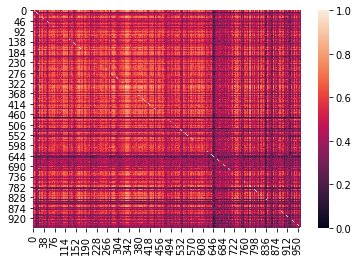

In [60]:
# Norming words if desired
if norm:
    X = (X - X.mean(axis=0)) / X.std(axis=0)

    # Compute cosine similarity matrix on the individual letters (i.e. vectors)
cosinesim = sklearn.metrics.pairwise.cosine_similarity(X)

# Plot it
sns.heatmap(cosinesim)

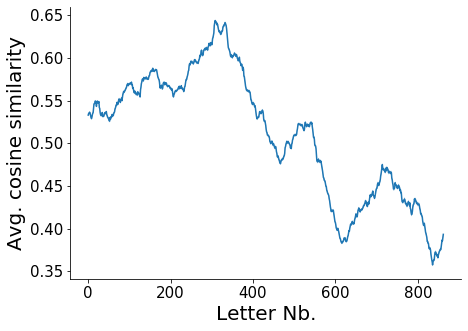

In [54]:
# We now slide a window of size 'window_size' over the 963 letters
# and compute the average pairwise cosine similarity 
window_size = 100

avg_similarities = []
se_similarities = []
nb_letter = range(0, len(cosinesim)-window_size)
for i in nb_letter:
    # Extract the similarity values from the triangular submatrix
    # from i to i+windowsize, excluding the 1s on diagonal
    submatrix = cosinesim[i:i+window_size,i:i+window_size]
    similarities = submatrix[np.triu_indices(window_size, k=1)]
    
    # Compute avg and sem
    avg_similarities.append(np.mean(similarities))
    se_similarities.append(sp.stats.sem(similarities))
avg_similarities = np.array(avg_similarities)
se_similarities = np.array(se_similarities)

# Generate plot and make visually more pleasing
fig, ax = plt.subplots(1,1,figsize=(7,5))
ax.set_xlabel("Letter Nb.", size=20)
ax.set_ylabel("Avg. cosine similarity", size=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.plot(nb_letter, avg_similarities)
ax.fill_between(nb_letter, avg_similarities-se_similarities, avg_similarities+se_similarities, alpha=.5)